# Exploring the trade off between long and short term relief

He we use the fluid model to model the flow through shelter and housing where we use:

* a high initial demand (i.e. number in system) of 20000 and
* a low arrival rate of 5/day

so that the number of houses we need to reach steady state will not cause the number of unsheltered people to drop to zero. 

With shelters costing 1/3 of houses and a mean housing service time of 5 years, we know that it will take 10 years before the benefit is seen (on the unsheltered population) of building a house versus spending the same money on shelter. See bottom of notebook 09 for details of this calculation. 

We therefore restrict building to the first year and model the system for 20 years so that money spent on shelter has a positive effect in (roughly) the first half of the modeling period, but money spent on housing has a positive effect in (roughly) the second half of the modeling period. 

We start by building (in the first year) enough houses so that the service rate exactly matches the arrival rate thereafter. 


In [1]:
import fluid_flow_model as fl
import matplotlib.pyplot as plt

In [9]:
data_as_is = {'initial_capacity': {'housing': 4000, 'shelter': 1500},
 'initial_demand': 20000,
 'service_mean': {'housing': 5.0, 'shelter': 0.0},
 'arrival_rates': [5]*20}
solution = {'housing': [(5*5*365)*1.0], 'shelter': [1500]}
T_a = 1*365 # building horizon (days)
T_b = 19*365 # modelling horizon (days)
c_s = 1/3 # cost of shelter relative to housing

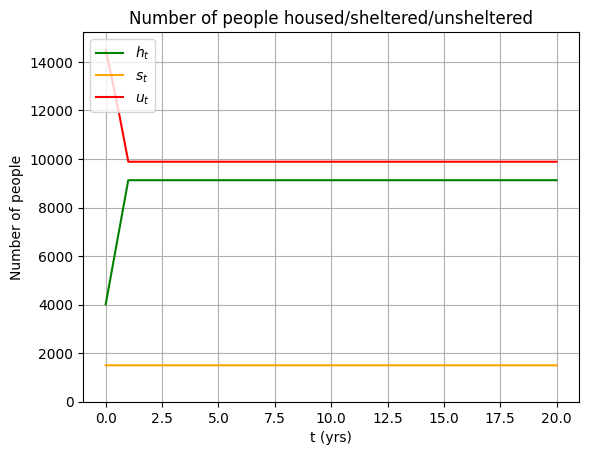

In [10]:
model = fl.FluidFlowModel(data_as_is, solution, T_a, T_b)
T = [i for i in range(T_a+T_b)]
model.analyse(T)
model.plot(T_a+T_b)

We now incrementally reduce the amount we spend on housing in the first year, spending instead what we can afford (with the reduction) on extra shelter. What we see is initial improvements (i.e. short term gain) but an unstable system and queues rising in long term (long term loss). 

In [13]:
u = []
s = []
h = []

for i in range(5):
    h_reduction = (solution['housing'][0]-data_as_is['initial_capacity']['housing'])*(i/10)
    solution_adapt = {'housing': [solution['housing'][0]-h_reduction],
                      'shelter': [solution['shelter'][0]+h_reduction/c_s]}
    model = fl.FluidFlowModel(data_as_is, solution_adapt, T_a, T_b)
    T = [i for i in range(T_a+T_b)]
    model.analyse(T)
    u.append(model.u)
    s.append(model.s)
    h.append(model.h)    

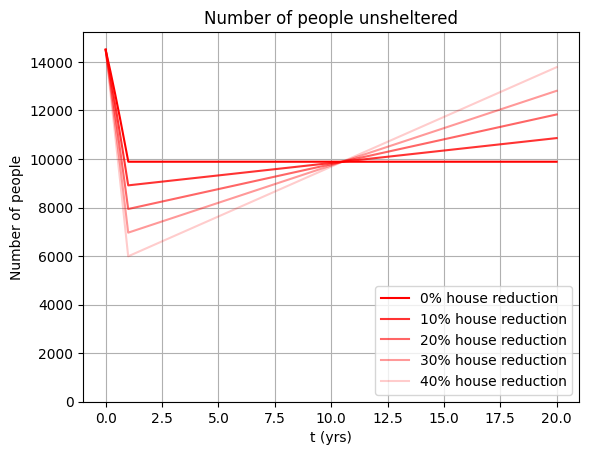

In [17]:
fig, ax = plt.subplots()
ymax = max(max(u)+max(s)+max(h))        

# plot solutions
x = [t/365 for t in range(T_a+T_b)]
for i in range(5):
    ax.plot(x, u[i], color = 'red', alpha = 1-i/5)
    ax.set(xlabel='t (yrs)', ylabel='Number of people',
           title='Number of people unsheltered')
ax.legend([str(i*10) + '% house reduction' for i in range(5)], loc="lower right")
ax.grid()
ax.set_ylim(0,ymax*1.05)

# general
plt.show()


We might consider the following: 

* We'd probably be able to build more later, so perhaps the trade off should be short term gain vs. how quickly we can get to steady state. 
* Remember we're considering the possibility of converting shelter into housing
* An objective function should capture these long and short term performance indicators. 